# _Star Wars_ Survey
In this project, we will explore the results of a survey of 835 _Star Wars_ fans. The data was collected by FiveThirtyEight and is available __[here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)__. The respondents were asked their opinions on the first six _Star Wars_ movies. We will try to answer the following questions:
- What movies did the respondents enjoy the most?
- What movies were seen by the most respondents?
- Does gender appear to have an effect on the most popular and the most viewed movies?
- Which characters were the respondents favorite and least favorite?

## Introduction
First, we will read the data into a dataframe and explore the first few rows.

In [1]:
import pandas as pd

#Read in the dataset
star_wars = pd.read_csv('star_wars.csv',
                        encoding = 'ISO-8859-1')

#Prevent truncated columns
pd.set_option('display.max_columns', None)

#Display the first 10 rows of the dataset
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return 

After exploring the first few rows of the dataset, we can see that the `RespondentID` column has at least one null value. The `RespondentID` value is a unique value given to each survey respondent. Therefore, we will remove any row that has a null value for this column when we clean our dataset. 

Next, we will take a look at our column names.

In [2]:
#List all column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

While some of our column names are very clear, others are very vague. There are many columns that are unnamed. These columns will be renamed appropriately.

## Cleaning the Data
First, we will remove the rows where the `RespondentID` value is null.

In [3]:
#Only select rows where the 'RespondentID' is not null
star_wars = star_wars[star_wars["RespondentID"].notnull()]

#Print the first 5 rows of data
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The two columns after the `RespondentID` column have either `Yes`, `No`, or null values. In order to make these columns easier to analyze, we will convert the `Yes` and `No` values to boolean values.

In [4]:
#Create a map that matches values to their corresponding boolean value
boolmap = {"Yes": True, "No": False}

#Select the columns to be mapped
cols = [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
]

#Map the values in each column using the boolean map
star_wars[cols[0]] = star_wars[cols[0]].map(boolmap)
star_wars[cols[1]] = star_wars[cols[1]].map(boolmap)

#Print the first 5 rows
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Columns 3-9 ask the respondent whether they have seen each of the _Star Wars_ movies. Each column corresponds to a different movie. If the respondent has seen the movie, the movie name appears in the column; otherwise, the column is given a null value. In order to make these columns easier to read and analyze, we will rename each column and change the values to boolean values. 

In [5]:
import numpy as np

#Select the columns to be mapped
cols = star_wars.columns[3:9]

#Match the values to their corresponding boolean values
mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
     np.nan: False
         }

#Use the boolean map to map values in each column selected
for col in cols:
    star_wars[col] = star_wars[col].map(mapping)
    
#Rename each column to indicate the corresponding movie
star_wars = star_wars.rename(columns = 
                            {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
                            "Unnamed: 4": "seen_2", "Unnamed: 5": "seen_3",
                            "Unnamed: 6": "seen_4", "Unnamed: 7": "seen_5",
                            "Unnamed: 8": "seen_6"})

#Print the first 5 rows
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In the next six columns, the respondents are asked to rank the movies, with ranking 1 being the best. We will rename these columns appropriately.

In [6]:
#Convert the values in the indicated columns to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

#Rename each column to indicate the corresponding movie
star_wars = star_wars.rename(columns = 
                            {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
                            "Unnamed: 10": "ranking_2", "Unnamed: 11": "ranking_3",
                            "Unnamed: 12": "ranking_4", "Unnamed: 13": "ranking_5",
                            "Unnamed: 14": "ranking_6"})

#Print the first 5 rows of the indicated columns
star_wars.iloc[:, 9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


Lastly, we will rename the remaining untitled columns. The respondent is asked their opinion on various _Star Wars_ characters. We will rename each column with the correct character. 

In [7]:
#Rename each column to indicate the corresponding character
star_wars = star_wars.rename(columns = 
                            {"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "han_solo",
                            "Unnamed: 16": "luke_skywalker", "Unnamed: 17": "princess_leia_organa",
                            "Unnamed: 18": "anakin_skywalker", "Unnamed: 19": "obi_wan_kenobi",
                            "Unnamed: 20": "emperor_palpatine", "Unnamed: 21": "darth_vader",
                            "Unnamed: 22": "lando_calrissian", "Unnamed: 23": "boba_fett",
                            "Unnamed: 24": "c-3p0", "Unnamed: 25": "r2_d2", "Unnamed: 26": "jar_jar_binks",
                            "Unnamed: 27": "padme_amidala", "Unnamed: 28": "yoda"})

#Print the first 5 rows of the indicated columns
star_wars.iloc[:, 15:29].head()

,han_solo,luke_skywalker,princess_leia_organa,anakin_skywalker,obi_wan_kenobi,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c-3p0,r2_d2,jar_jar_binks,padme_amidala,yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


## Analyzing the Data
Now that we have cleaned the data, we can begin to answer our questions. We will start with finding the movie(s) that the respondents enjoyed the most.

### Average Ranking and Number of Views
We will use the average ranking of each movie to determine which movie(s) the respondents enjoyed the most. As the respondents were asked to rank the movies with 1 being their favorite and 6 being their least favorite, a lower average numerical value will indicate a higher ranking.

In [8]:
#Calculate the mean of each of the indicated columns
mean_rankings = star_wars.iloc[:,9:15].mean()

#Print the means
print(mean_rankings)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


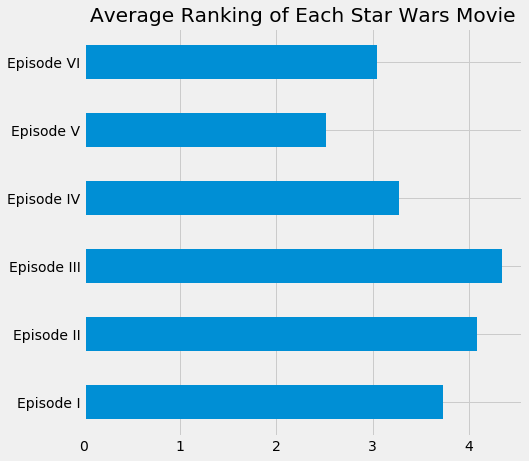

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Create a horizontal bar chart of the mean rankings
ax = mean_rankings.plot.barh(figsize = (7, 7))
ax.set_title('Average Ranking of Each Star Wars Movie')
ax.set_yticklabels(['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'])


plt.show()

As we can see in the graph above, _Star Wars: Episode V_ had the highest ranking and _Star Wars: Episode III_ had the lowest ranking. The original _Star Wars_ trilogy (_Episodes IV - VI_) is ranked higher than any of the prequel trilogy (_Episodes I - III_). 

Next, we will look at how many respondents viewed each movie.

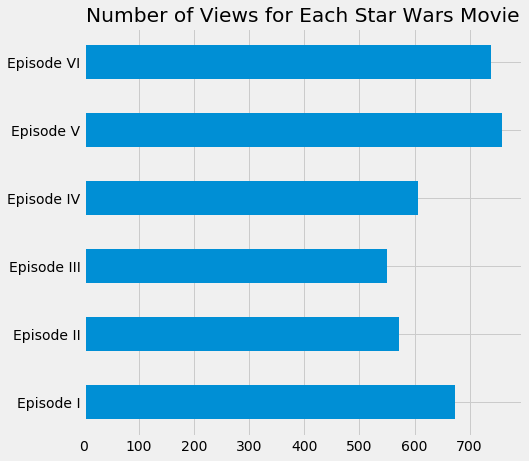

In [18]:
#Calculate the total number of respondents who have seen each movie
num_watched = star_wars.iloc[:, 3:9].sum()

#Create a horizontal bar chart of the sums
ax = num_watched.plot.barh(figsize = (7, 7))
ax.set_title('Number of Views for Each Star Wars Movie')
ax.set_yticklabels(['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'])


plt.show()


The most watched movie was _Star Wars: Episode V_, and the least watched movie was _Star Wars: Episode III_. This coincides with the highest and lowest ranked movies. Comparing the two graphs, it appears that higher rankings tend to have higher viewing counts. It is possible that respondents of the survey tended to rank movies they had not seen lower than the movies they had seen.

### Average Ranking and Number of Views by Gender
Next, we will explore whether gender appears to have an affect on the survey responses.

In [11]:
#Select rows of the dataset where the gender is male
male = star_wars[star_wars["Gender"] == "Male"]

#Select rows of the dataset where the gender is female
female = star_wars[star_wars["Gender"] == "Female"]

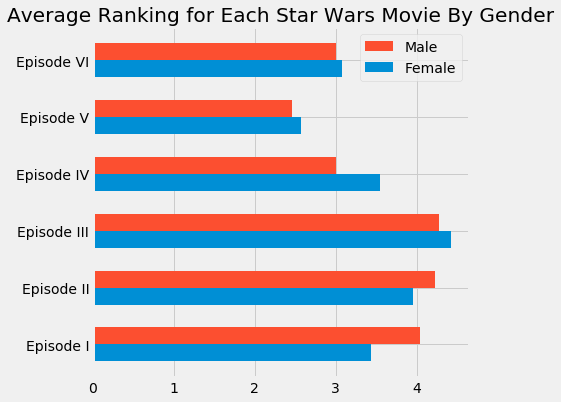

In [19]:
fig, ax = plt.subplots(figsize = (6, 6))

y_labels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
y = np.arange(len(y_labels))
height = 0.3

female_rankings = female.iloc[:, 9:15].mean()
ax.barh(y = y - 0.15, width = female_rankings, height = height, label = 'Female')

male_rankings = male.iloc[:, 9:15].mean()
ax.barh(y = y + 0.15, width = male_rankings, height = height, label = 'Male')

ax.set_title('Average Ranking for Each Star Wars Movie By Gender')
ax.set_yticks(y)
ax.set_yticklabels(y_labels)


ax.legend()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right')

plt.show()

Looking at the graph above, we can see that males tended to rank _Episodes III - VI_ higher than females did. However, the difference in the mean ranking is relatively small. The two largest disparities are _Episode IV_, which males ranked higher, and _Episode I_, which females ranked higher.

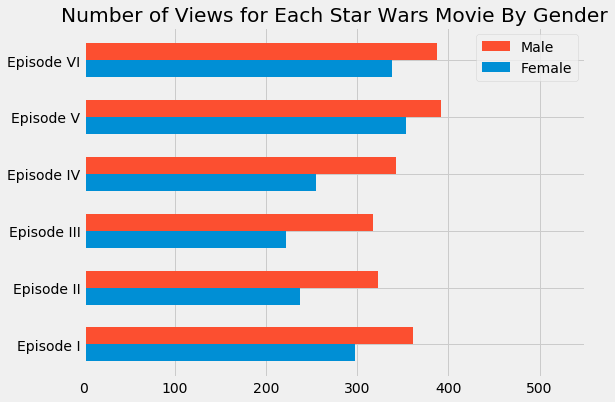

In [20]:
fig, ax = plt.subplots(figsize = (8, 6))


y_labels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
y = np.arange(len(y_labels))
height = 0.3

female_seen = female.iloc[:, 3:9].sum()
ax.barh(y = y - 0.15, width = female_seen, height = height, label = 'Female')

male_seen = male.iloc[:, 3:9].sum()
ax.barh(y = y + 0.15, width = male_seen, height = height, label = 'Male')

ax.set_title('Number of Views for Each Star Wars Movie By Gender')
ax.set_yticks(y)
ax.set_yticklabels(y_labels)

ax.set_xlim(0, 550)

ax.legend()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right')

plt.show()

We can see in the graph above that in this survey, more males viewed each movie. The difference in views between the genders is smallest in _Episodes V_ and _VI_, and the difference is largest in _Episodes II_ and _III_. The first inclination one might have is that perhaps more males took the survey than females, and this accounts for the difference in views. However, when we check the value counts for gender, we see differently.

In [14]:
star_wars['Gender'].value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

We can see that while the male respondents watched more of the _Star Wars_ movies, more females took the survey. This could indicate that males tend to watch _Star Wars_ more than females do.

### Character Opinions
Next, we will explore the respondent's opinions on popular characters in the films. 

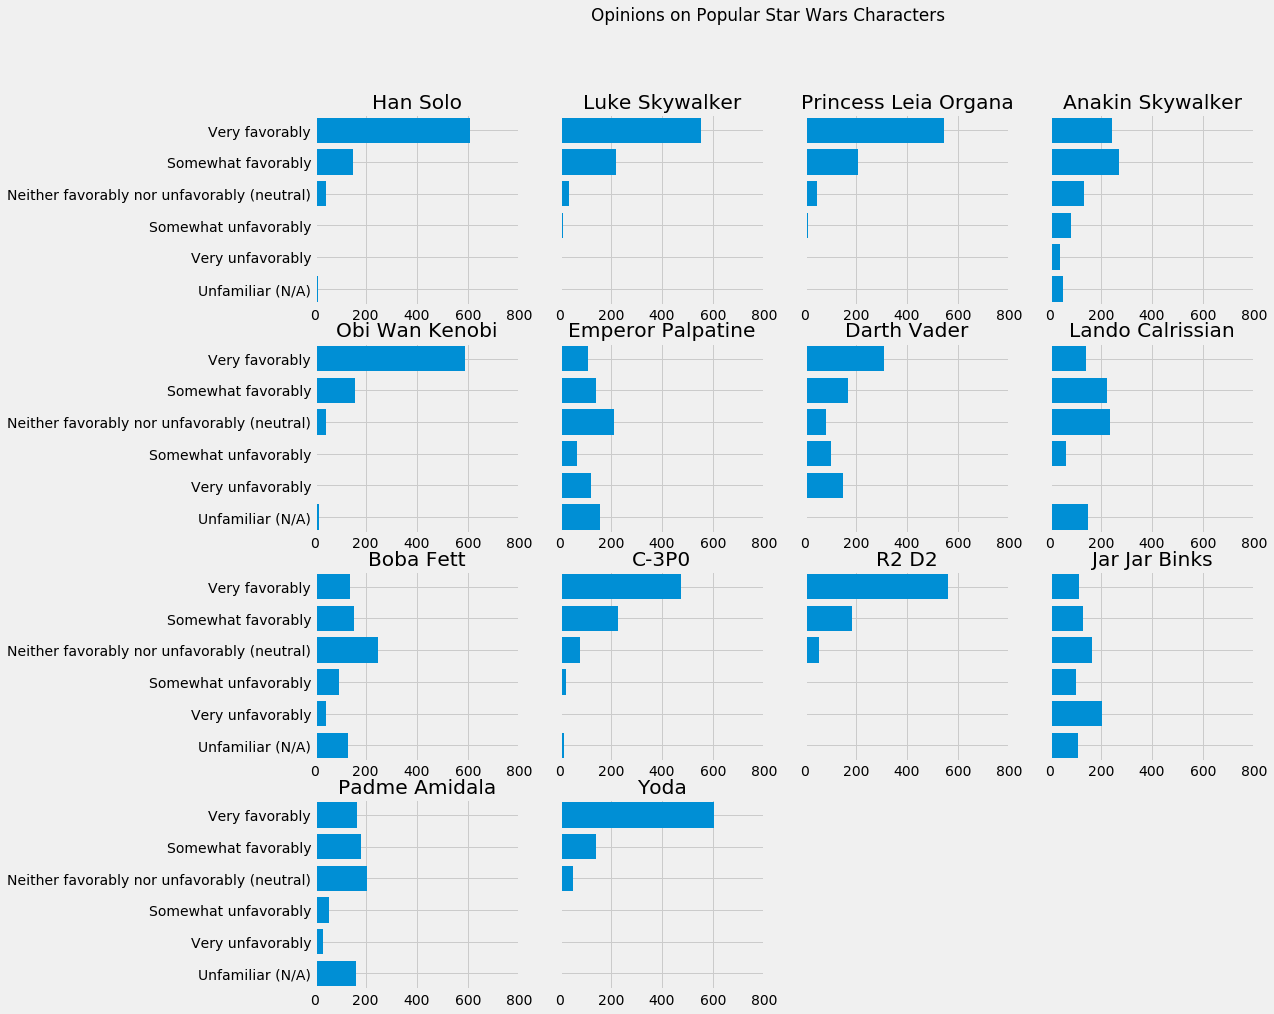

In [21]:
characters = ["han_solo", "luke_skywalker","princess_leia_organa", "anakin_skywalker", "obi_wan_kenobi",
              "emperor_palpatine", "darth_vader", "lando_calrissian", "boba_fett", "c-3p0", "r2_d2", 
              "jar_jar_binks", "padme_amidala", "yoda"]
character_names = ["Han Solo", "Luke Skywalker","Princess Leia Organa", "Anakin Skywalker", "Obi Wan Kenobi",
              "Emperor Palpatine", "Darth Vader", "Lando Calrissian", "Boba Fett", "C-3P0", "R2 D2", 
              "Jar Jar Binks", "Padme Amidala", "Yoda"]


fig = plt.figure(figsize = (15, 15))
fig.suptitle('Opinions on Popular Star Wars Characters')

labels = ['Unfamiliar (N/A)', 'Very unfavorably', 'Somewhat unfavorably', 'Neither favorably nor unfavorably (neutral)',
         'Somewhat favorably', 'Very favorably']


for i in range(14):
    ax = fig.add_subplot(4, 4, i + 1)
    char_ratings = star_wars[characters[i]].value_counts().reindex(labels) #Ensure that all plots have the same order


    ax.barh(y = range(len(char_ratings)), width = char_ratings)
    char_ratings.plot.barh()
    ax.set_title(character_names[i])
    ax.set_xlim(0, 800)

    
    if i % 4 != 0:
        ax.set_yticklabels([])

plt.show()



We can see in the graphs above that there are many characters that have an overwhelming number of positive ratings: Han Solo, Luke Skywalker, Princess Leia Organa, Obi Wan Kenobi, C-3PO, R2 D2, and Yoda. The majority of these characters were featured prominently in the original _Star Wars_ trilogy, _Episodes IV - VI_. The only character who was commonly rated as `Very unfavorably` was Jar Jar Binks.
We can also see that characters with a higher `Unfamiliar` rating also tended to have a higher `Neutral` rating. 